In [1]:
import pandas as pd
from datetime import datetime

In [2]:
###import stock data
stocks_all = pd.read_csv('../data/stock_px.csv', sep=',', index_col=0, parse_dates=True)
stocks_all.head(7)


,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57


In [3]:
stocks_all.shape

(2214, 4)

In [4]:
stocks = stocks_all[['AAPL', 'MSFT', 'XOM']]
stocks.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [5]:
#downsample day data to weekly data using mean as aggregate function
stock_down = stocks.resample('W').mean()
stock_down.head()

,AAPL,MSFT,XOM
2003-01-05,7.425,21.125,29.2300
2003-01-12,7.372,21.732,29.2420
2003-01-19,7.240,21.726,28.8700
2003-01-26,6.985,20.085,27.4925
2003-02-02,7.234,19.142,27.2980


In [6]:
stock_down1 = stocks.resample('W').sum()
stock_down1.head()

,AAPL,MSFT,XOM
2003-01-05,14.85,42.25,58.46
2003-01-12,36.86,108.66,146.21
2003-01-19,36.20,108.63,144.35
2003-01-26,27.94,80.34,109.97
2003-02-02,36.17,95.71,136.49


In [7]:
###upscale from a daily data to every 6hrs data
stock_up = stocks.resample('6h').sum()
stock_up.head()

,AAPL,MSFT,XOM
2003-01-02 00:00:00,7.40,21.11,29.22
2003-01-02 06:00:00,0.00,0.00,0.00
2003-01-02 12:00:00,0.00,0.00,0.00
2003-01-02 18:00:00,0.00,0.00,0.00
2003-01-03 00:00:00,7.45,21.14,29.24


In [8]:
stock_up1 = stocks.resample('6h').interpolate()
stock_up1.head()

,AAPL,MSFT,XOM
2003-01-02 00:00:00,7.4000,21.1100,29.220
2003-01-02 06:00:00,7.4125,21.1175,29.225
2003-01-02 12:00:00,7.4250,21.1250,29.230
2003-01-02 18:00:00,7.4375,21.1325,29.235
2003-01-03 00:00:00,7.4500,21.1400,29.240


In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:>

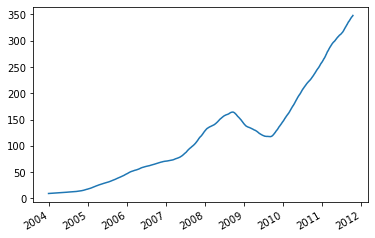

In [11]:
stocks['AAPL'].rolling(250).mean().plot()

In [12]:
###class exercise on bike
bike_trip = pd.read_csv('../data/train.csv', sep=',', index_col=0, parse_dates=True)
bike_trip.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [26]:
bike_trip.index.resolution

'hour'

In [13]:
bike_trip.shape

(10886, 11)

In [14]:
###extract feature(observation) based on time range
##time range is 1st of jan to 5th of Jan
bike_trip['2011-01-01':'2011-01-05']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2011-01-05 19:00:00,1,0,1,1,9.84,12.880,38,7.0015,5,127,132
2011-01-05 20:00:00,1,0,1,1,9.02,11.365,47,11.0014,7,82,89
2011-01-05 21:00:00,1,0,1,1,8.20,9.850,51,12.9980,3,40,43


<AxesSubplot:xlabel='datetime'>

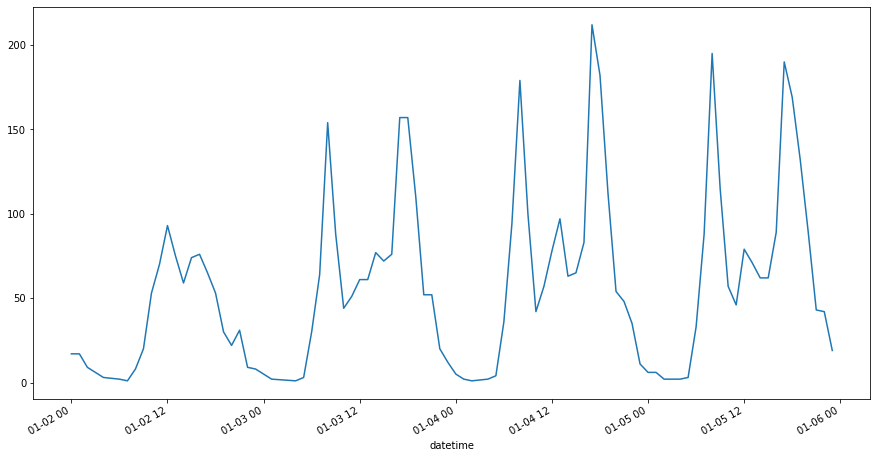

In [19]:
###plot small section of the data
bike_trip['count']['2011-01-02':'2011-01-05'].plot(figsize=(15, 8))



<AxesSubplot:xlabel='datetime'>

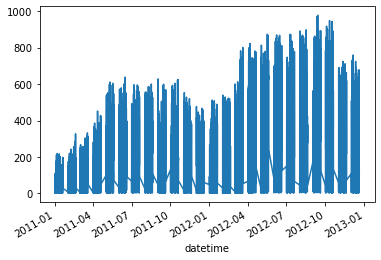

In [25]:
bike_trip['count'].plot()

In [22]:
###Group by a time feature and observe grouped means
###resample data based on every 6hrs
bike_trip.resample('6H').mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1.0,0.0,0.0,1.166667,9.566667,13.889167,77.666667,1.000533,3.166667,14.000000,17.166667
2011-01-01 06:00:00,1.0,0.0,0.0,1.000000,11.753333,15.782500,79.000000,5.999850,8.333333,11.500000,19.833333
2011-01-01 12:00:00,1.0,0.0,0.0,1.833333,18.040000,21.968333,77.000000,19.500350,34.500000,57.833333,92.333333
2011-01-01 18:00:00,1.0,0.0,0.0,2.333333,17.083333,21.085000,88.666667,16.498750,9.166667,25.666667,34.833333
2011-01-02 00:00:00,1.0,0.0,0.0,2.000000,18.368000,22.271000,94.000000,16.398920,2.000000,8.400000,10.400000
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-18 18:00:00,4.0,0.0,1.0,1.000000,14.760000,17.928333,48.333333,14.334650,8.500000,246.000000,254.500000
2012-12-19 00:00:00,4.0,0.0,1.0,1.000000,11.206667,14.520000,69.333333,6.000967,1.833333,15.166667,17.000000
2012-12-19 06:00:00,4.0,0.0,1.0,1.000000,11.890000,15.151667,72.666667,8.501183,12.500000,293.166667,305.666667


In [23]:
bike_trip.resample('24H').mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,13.791667,27.250000,41.041667
2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,5.695652,29.130435,34.826087
2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,5.454545,55.863636,61.318182
2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,4.695652,63.217391,67.913043
2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,3.565217,66.000000,69.565217
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,1.375000,13.290833,16.919167,65.041667,7.125450,31.958333,178.333333,210.291667
2012-12-16,4.0,0.0,0.0,2.041667,14.862500,18.496875,83.875000,6.749692,22.416667,135.333333,157.750000
2012-12-17,4.0,0.0,1.0,2.125000,16.126667,20.075000,90.708333,6.583308,8.833333,182.208333,191.041667
